# Assignment  week 2

Steven Raaijmakers (10804242) & Ajit Jena (5730066)

## Deel 0

<p>Beschouw de volgende simpele ongerichte graaf:</p>
<center>
    V = {1, 2, 3, 4, 5} en 
    E = { (1, 2) , (1, 4) , (2, 3) , (2, 4) , (2, 5) , (3, 4) , (3, 5) }
</center>

<ol> 
<li>Teken dit netwerk. Teken het zo dat er geen lijnen overlappen (dit kan, het is een zogeheten planar graph).</li>

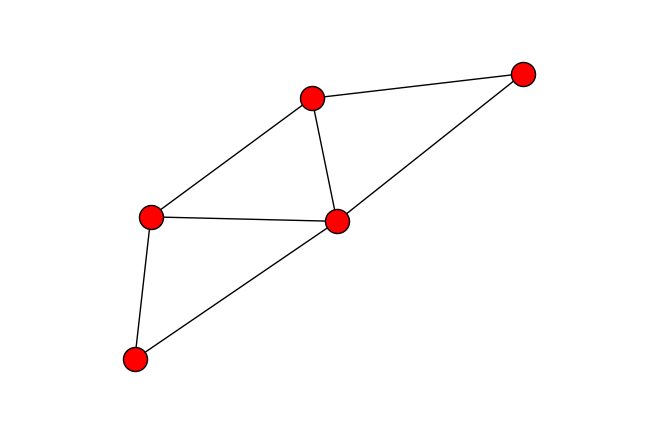

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

import networkx as nx

G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_edges_from([(1, 2) , (1, 4) , (2, 3) , (2, 4) , (2, 5) , (3, 4) , (3, 5)])

nx.draw(G)

<li>Maak een tabel met twee kolommen: 
<pre>
        Knoop  Neighbour set
        1      2,4
        2      
        ...
    </pre></li>

In [35]:
for n in nx.nodes_iter(G):
    print str(n) + "      ",
    for nn in nx.all_neighbors(G, n):
        print str(nn) + ",",
    print ""

1       2, 4, 
2       1, 3, 4, 5, 
3       2, 4, 5, 
4       1, 2, 3, 
5       2, 3, 


<li>Hoeveel lijnen moet je toevoegen om hier een volledige (clique) graaf van te maken?</li>

In [36]:
CG = nx.complete_graph(5)
linesCG = len(CG.edges())
linesUG = len(G.edges())
print linesCG - linesUG

3


<li>Maak een tabel met twee kolommen: 
        <pre>
        Knoop  Degree
        1      2
        2
        ...
    </pre></li>

In [37]:
print "Knoop   Degree"
for n in nx.nodes_iter(G):    
    print str(n) + "       " + str(len(list(nx.all_neighbors(G, n))))

Knoop   Degree
1       2
2       4
3       3
4       3
5       2


<li>Geef de subgraven geinduceerd door {1,2,3} en {2,5,3} en {5,4}.</li>

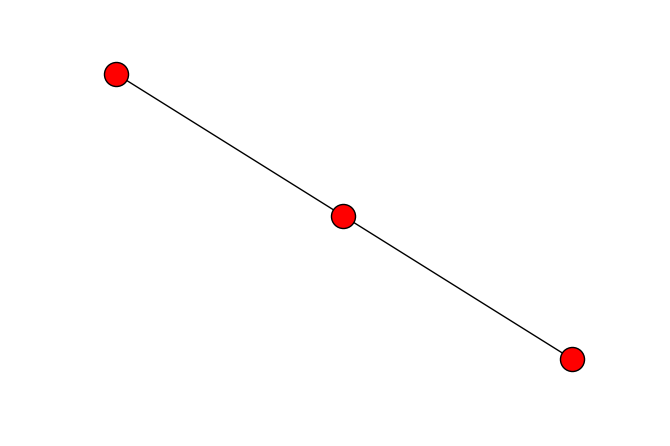

In [38]:
A = G.subgraph([1,2,3])
B = G.subgraph([2,5,3])
C = G.subgraph([5,4])

nx.draw(A)

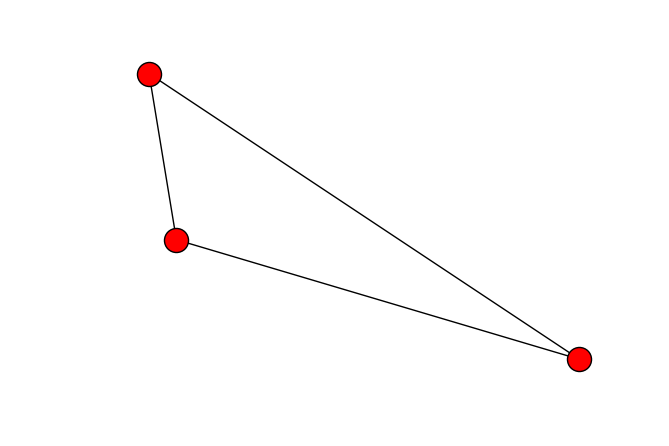

In [39]:
nx.draw(B)

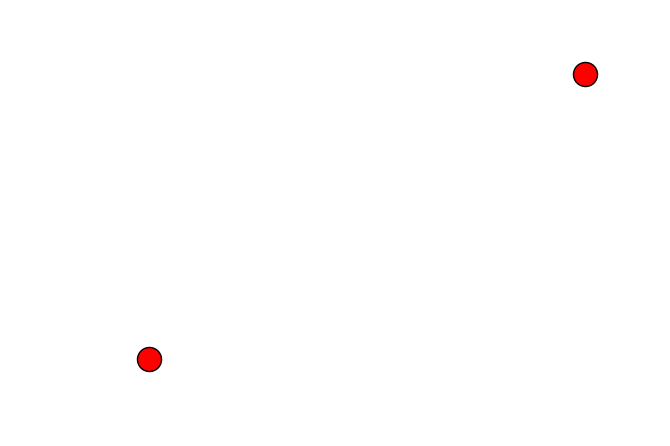

In [40]:
nx.draw(C)

<li>Maak de adjency matrix van dit netwerk
    <pre>
        1 2 3 4 5
      1 0 1 0 1 0
      2
      3
      4
      5
    </pre>

In [41]:
A = nx.adjacency_matrix(G).todense()
print A

[[0 1 0 1 0]
 [1 0 1 1 1]
 [0 1 0 1 1]
 [1 1 1 0 0]
 [0 1 1 0 0]]


<li>Geef de knopen andere namen, en laat zien dat de twee netwerken isomorf zijn. (Dat is, definieer de functie van knopen naar knopen).</li>

In [42]:
H = nx.Graph()
H.add_nodes_from([6, 7, 8, 9, 10])
H.add_edges_from([(6, 7) , (6, 9) , (7, 8) , (7, 9) , (7, 10) , (8, 9) , (8, 10)])

print nx.is_isomorphic(G, H)

True


<li>Maak de korste paden matrix van dit netwerk: in iedere cel zet je de lengte van het kortste pad
        <pre>
        1 2 3 4 5
      1   1 2 1 2 
      2
      3
      4
      5
    </pre>
    </li>

In [43]:
print "  1 2 3 4 5"
for i in range(1, 6):
    print i, 
    for j in range(1, 6):
        k = nx.shortest_path_length(G, i, j)
        if k!=0:
            print k,
        else:
            print " ",
    print ""

  1 2 3 4 5
1   1 2 1 2 
2 1   1 1 1 
3 2 1   1 1 
4 1 1 1   2 
5 2 1 1 2   


<li>Wat is/zijn de minimale vertex cut(s)? </li>

In [44]:
print nx.minimum_node_cut(G)

set([2, 3])


<li>Maak een tabel met twee kolommen: 
    <pre>
        Knoop  Eccentricy (langste kortse pad)
        1      2
        2
        ...
    </pre></li>

In [45]:
print "Knoop   Eccentricy"
for i in range(1, 6):
    print str(i) + "      ",
    print max([nx.shortest_path_length(G, i, j) for j in range(1, 6)])

Knoop   Eccentricy
1       2
2       1
3       2
4       2
5       2


<li>Wat is de radius van de graaf? Wat is de diameter?</li>

In [46]:
d = nx.diameter(G)

print "Radius: " + str(nx.radius(G)) + ", Diameter: " + str(d)

Radius: 1, Diameter: 2


<li>Welke lijn(en) moet je minimaal weghalen om de diameter te laten stijgen?</li>

In [76]:
for e1, e2 in G.edges():
    Tmp = G.copy()
    Tmp.remove_edge(e1, e2)
    d2 = nx.diameter(Tmp)
    if d != d2:
        print "(" + str(e1) + ", " + str(e2) + ")"

(1, 2)
(2, 5)


 <li>Welke lijn(en) kan je allemaal  weghalen zonder de diameter te laten stijgen? Wat is er zo bijzonder aan het netwerk dat overblijft?</li>

In [75]:
for e1, e2 in G.edges():
    Tmp = G.copy()
    Tmp.remove_edge(e1, e2)
    d2 = nx.diameter(Tmp)
    if d == d2:
        print "(" + str(e1) + ", " + str(e2) + ")"

(1, 4)
(2, 3)
(2, 4)
(3, 4)
(3, 5)


<li>Je wilt nog een knoop toevoegen aan dit netwerk, maar wel diameter 2 houden. Hoeveel lijnen moet je dan minimaal trekken? </li>

In [ ]:
14

<li>Je wilt nog een knoop toevoegen aan dit netwerk, maar die mag geen directe vriend zijn van knoop 2 en  je wilt wel diameter 2 houden. Hoeveel lijnen moet je dan minimaal trekken?  </li>

In [ ]:
15

 <li> Bereken met behulp van je tabel met lengtes van kortste paden de avarage path length.</li>

In [5]:
print(nx.average_shortest_path_length(G))

1.3


<li>Bereken de characteristic path length.</li>

In [111]:
all = []
for i in range(1, 6):
    tmp = 0;
    for j in range(1, 6):
        tmp += nx.shortest_path_length(G, i, j)
    all.append(tmp / 4.0)
print sorted(all)[2]

1.25


## Deel 1

Bereken en print (naar het scherm) de adjacency matrix 

In [91]:
M = nx.read_graphml("macbethcorrected.graphml")
M_A = nx.adjacency_matrix(M)
print(M_A.todense())

[[0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0]
 [1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1]
 [0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1]
 [0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0]
 [1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0]
 [0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0]]


 Bereken voor ieder personage zijn "neighbour set" en zijn "degree", print 3 kolommen: personage       neighbour set            degree

In [93]:
for n in nx.nodes_iter(M):
    neighbors = [k for k in nx.all_neighbors(M, n)]
    print str(n) + ": " + str(neighbors) + " - " + str(len(neighbors))

FirstWitch: ['ALL', 'ThirdWitch', 'MACBETH', 'SecondWitch'] - 4
ALL: ['LENNOX', 'MACDUFF', 'SecondWitch', 'MALCOLM', 'MACBETH', 'ThirdWitch', 'BANQUO', 'FirstWitch', 'ROSS'] - 9
MACDUFF: ['SIWARD', 'ALL', 'MALCOLM', 'MACBETH', 'ROSS'] - 5
BANQUO: ['ALL', 'SecondMurderer', 'DUNCAN', 'MALCOLM', 'MACBETH', 'FirstMurderer', 'LADYMACBETH'] - 7
SecondMurderer: ['BANQUO', 'FirstMurderer'] - 2
DUNCAN: ['MALCOLM', 'BANQUO'] - 2
SIWARD: ['MALCOLM', 'MACDUFF', 'MACBETH'] - 3
MALCOLM: ['ALL', 'MACDUFF', 'LENNOX', 'SIWARD', 'DUNCAN', 'MACBETH', 'BANQUO', 'ROSS'] - 8
LENNOX: ['LADYMACBETH', 'ALL', 'MALCOLM', 'MACBETH', 'ROSS'] - 5
ThirdWitch: ['ALL', 'MACBETH', 'SecondWitch', 'FirstWitch'] - 4
MACBETH: ['FirstWitch', 'ALL', 'MACDUFF', 'BANQUO', 'SIWARD', 'MALCOLM', 'LENNOX', 'ThirdWitch', 'FirstMurderer', 'Servant', 'Messenger', 'SecondWitch', 'LADYMACBETH', 'SEYTON', 'ROSS'] - 15
Servant: ['MACBETH'] - 1
Messenger: ['MACBETH'] - 1
SecondWitch: ['ALL', 'FirstWitch', 'ThirdWitch', 'MACBETH'] - 4
LADY

Bereken en print de adjacency matrix van de "subgraph induced by" Macbeth, Lady en Banquo.

In [94]:
tmp = ["MACBETH", "LADYMACBETH", "BANQUO"]

mlb = nx.subgraph(M, tmp)

mlb_a = nx.adjacency_matrix(mlb)
print(mlb_a.todense())

[[0 1 1]
 [1 0 1]
 [1 1 0]]


Teken deze graaf.

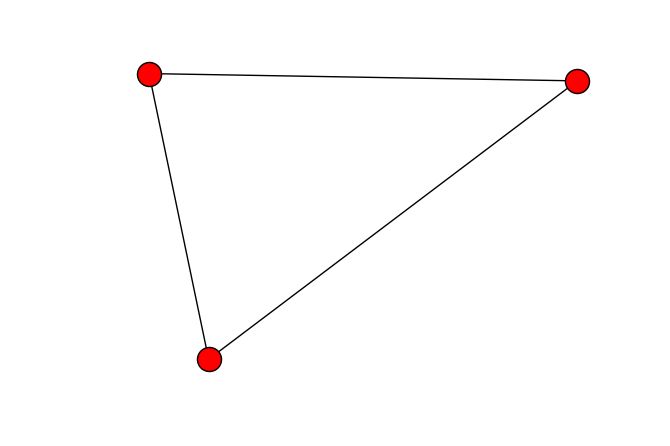

In [64]:
nx.draw(mlb)

Teken alle grote volledige deelgrafen in de Macbeth graaf (alleen die met meer dan 3 knopen). 

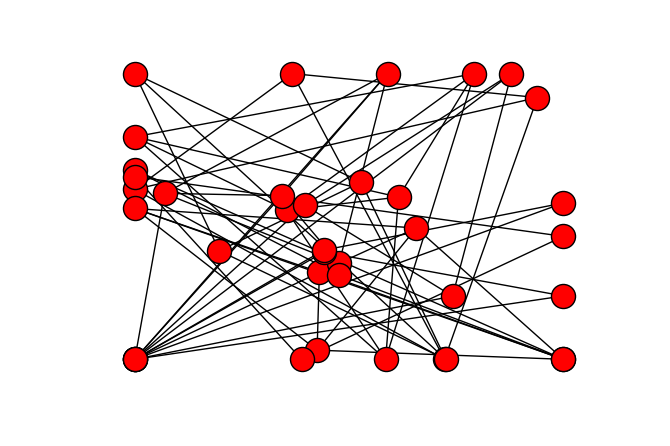

In [106]:
j = [nx.subgraph(M, i) for i in nx.find_cliques(M)]

for i in j:
    if len(i.nodes()) >= 3:
        nx.draw(i)

# Deel 2

## 3.7
__1. In 2-3 sentences, explain what triadic closure is, and how it plays a role in the formation
of social networks. You can draw a schematic picture in case this is useful.__
Als node A een sterke link heeft naar node B en een sterke link naar node C, dan moeten B en C ook verbonden zijn. In sociale netwerken kan je dit bijvoorbeeld zien wanneer een persoon goede vrienden heeft; de kans groot is dat deze twee goede vrienden elkaar ook kennen.

__2.. Consider the graph in Figure 3.21, in which each edge — except the edge connecting
b and c — is labeled as a strong tie (S) or a weak tie (W).
According to the theory of strong and weak ties, with the strong triadic closure assumption,
how would you expect the edge connecting b and c to be labeled? Give a
brief (1-3 sentence) explanation for your answer.__
We verwachten dat de connectie tussen B en C weak is, hierdoor is er geen node die de STC aanname verbreekt. Wanneer deze namelijk strong zou zijn, creeër je bijvoorbeeld bij B een strong link naar C, en omdat B ook een strong link heeft met E, zouden C en E verbonden moeten zijn. Dit is echter niet het geval en hierdoor zou de STC verbroken worden.

__3 In the social network depicted in Figure 3.22, with each edge labeled as either a strong
or weak tie, which nodes satisfy the Strong Triadic Closure Property from Chapter 3,
and which do not? Provide an explanation for your answer.__
Wel STC:
B
D
A
Alle sterke link paren die beschikbaar zijn vanaf deze nodes zijn onderling ook verbonden

Niet STC:
C
E

C heeft een sterk-link-connectie naar (B, E) terwijl die onderling geen connectie hebben. Bij E zijn (D, C) streng verbonden terwijl die ook geen connectie hebben met elkaar.

__4. In the social network depicted in Figure 3.23 with each edge labeled as either a strong
or weak tie, which two nodes violate the Strong Triadic Closure Property? Provide an
explanation for your answer__
E via E->(D, C), terwijl D en C onderling geen verbinding hebben
C via C->(B, E), terwijl B en E onderling ook geen connectie hebben.

__5. In the social network depicted in Figure 3.23 with each edge labeled as either a strong
or weak tie, which two nodes violate the Strong Triadic Closure Property? Provide an
explanation for your answer__
Ze voldoen hier allemaal aan behalve C via C->(B, E) die onderling geen connectie hebben

### Problems 1 and 2 (from the homework for chapter 3 in the course given by Easley)

__In the social network depicted in Figure 1, with each edge labeled as either a strong
or weak tie, which nodes violate the Strong Triadic Closure Property from Chapter 3, and
which satisfy it? (Recall that unless a node violates the property, following the definition
from the book, it is said to satisfy it.) Provide an explanation for your answer.__


## A
__...Do these relations satisfy the Strong Triadic Closure Property?__
 “Yes, all nodes satisfy the Strong Triadic Closure Property.” 
 In dit voorbeeld hoeven we enkel te kijken naar nodes (dorpen) die minstens twee strong links heeft; dat hebben ze allemaal behalve het eerste en het twee dorp. Node 2 heeft een strong link naar 1 en 3, en 1 en 3 hebben onderling ook een link. Dit geld ook voor node 3, 4, 5, 6 en 7.
 
 ## B
Nee deze relatie valt niet onder Strong Triadic Closure Property. Een node heeft nu links tot 3 nodes links, en 3 nodes rechts van zichzelf (node = dorp). Bij node 4 is er dus een sterke link naar (2, 6), terwijl 2 en 6 niet onderling verbonden zijn omdat 2 enkel verbonden is met 3 nodes aan zijn rechterzijde en dus max tot het 5e dorp een link heeft.
 

## De vragen deel 2

* All exercises from Chap 3 E &amp; K. 
* Problems 1 and 2 from <a href='http://www.infosci.cornell.edu/courses/info2040/2011fa/ps1.pdf'>the homework for chapter 3 in the course given by Easley</a> (<a href='../../EXERCISES/EasleyandKleinberg2011Exercises/ps1.pdf'>Local copy</a>)    
                